## Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
import matplotlib.pyplot as plt

## Read data

In [2]:
df = pd.read_csv("data/medium_data.csv") # read the data
df.head() # review import

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/5-ways-to-deal-...,3 ways to deal with large datasets in Python,NaN,1.jpeg,284,2,3,Towards Data Science,2022-01-01
1,2,https://towardsdatascience.com/from-supervised...,From Supervised To Unsupervised Learning: A Pa...,Slowly removing the…,2.png,261,1,6,Towards Data Science,2022-01-01
2,3,https://towardsdatascience.com/top-python-libr...,Top Python Libraries for Visualization: A Star...,"<strong class=""markup--strong markup--h4-stron...",NaN,102,1,8,Towards Data Science,2022-01-01
3,4,https://towardsdatascience.com/simple-method-o...,Simple method of targeted TF-IDF topic modelin...,Using a targeted TF-IDF Topic…,4.jpg,21,0,5,Towards Data Science,2022-01-01
4,5,https://towardsdatascience.com/optimizing-pati...,Optimizing Patient Scheduling,Efficient Clinic Flow and Reduced…,5.png,99999,0,10,Towards Data Science,2022-01-01


In [3]:
df.describe() # describe data

,id,claps,responses,reading_time
count,5840.000000,5840.000000,5840.000000,5840.000000
mean,2920.500000,2705.367123,1.534760,7.702226
std,1686.007117,15745.468715,2.921856,3.861340
min,1.000000,0.000000,0.000000,2.000000
25%,1460.750000,46.000000,0.000000,5.000000
50%,2920.500000,106.000000,1.000000,7.000000
75%,4380.250000,207.000000,2.000000,9.000000
max,5840.000000,99999.000000,56.000000,81.000000


In [4]:
df.shape # check shape

(5840, 10)

## Add columns for analysis

In [5]:
# add columns based on words from the title of the article

df2 = df
df2["python"] = df2["title"].str.lower().str.contains("python|numpy|pandas|scipy|scikit-learn").astype(int)
df2["sql"] = df2["title"].str.lower().str.contains("sql").astype(int)
df2["r"] = df2["title"].str.lower().str.contains(" r ").astype(int)
df2["julia"] = df2["title"].str.lower().str.contains("julia").astype(int)
df2["scala"] = df2["title"].str.lower().str.contains("scala").astype(int)
df2["matlab"] = df2["title"].str.lower().str.contains("matlab|mathworks").astype(int)
df2["ml"] = df2["title"].str.lower().str.contains("machine learning|ml|supervised|unsupervised|reinforcement").astype(int)
df2["ai"] = df2["title"].str.lower().str.contains("artificial intelligence|ai").astype(int)
df2["modeling"] = df2["title"].str.lower().str.contains("modeling").astype(int)
df2["statistics"] = df2["title"].str.lower().str.contains("statistics").astype(int)
df2["data visualization"] = df2["title"].str.lower().str.contains("data visualization").astype(int)
df2["nlp"] = df2["title"].str.lower().str.contains("natural language processing|nlp").astype(int)
df2["deep learning"] = df2["title"].str.lower().str.contains("deep learning").astype(int)
df2["data engineering"] = df2["title"].str.lower().str.contains("data engineering").astype(int)
df2["optimization"] = df2["title"].str.lower().str.contains("optimization|operations research").astype(int)
df2["experimental design"] = df2["title"].str.lower().str.contains("experimental design|a/b testing").astype(int)
df2["big data analytics"] = df2["title"].str.lower().str.contains("big data analytics|hadoop|spark").astype(int)


In [6]:
df3 = df2.drop("image", axis=1) # remove column
df3.head()

,id,url,title,subtitle,claps,responses,reading_time,publication,date,python,...,ai,modeling,statistics,data visualization,nlp,deep learning,data engineering,optimization,experimental design,big data analytics
0,1,https://towardsdatascience.com/5-ways-to-deal-...,3 ways to deal with large datasets in Python,NaN,284,2,3,Towards Data Science,2022-01-01,1,...,0,0,0,0,0,0,0,0,0,0
1,2,https://towardsdatascience.com/from-supervised...,From Supervised To Unsupervised Learning: A Pa...,Slowly removing the…,261,1,6,Towards Data Science,2022-01-01,0,...,0,0,0,0,0,0,0,0,0,0
2,3,https://towardsdatascience.com/top-python-libr...,Top Python Libraries for Visualization: A Star...,"<strong class=""markup--strong markup--h4-stron...",102,1,8,Towards Data Science,2022-01-01,1,...,0,0,0,0,0,0,0,0,0,0
3,4,https://towardsdatascience.com/simple-method-o...,Simple method of targeted TF-IDF topic modelin...,Using a targeted TF-IDF Topic…,21,0,5,Towards Data Science,2022-01-01,0,...,0,1,0,0,0,0,0,0,0,0
4,5,https://towardsdatascience.com/optimizing-pati...,Optimizing Patient Scheduling,Efficient Clinic Flow and Reduced…,99999,0,10,Towards Data Science,2022-01-01,0,...,0,0,0,0,0,0,0,0,0,0


## Remove Nulls

In [7]:
df3.isnull().sum() # check nulls

id                       0
url                      0
title                    0
subtitle               879
claps                    0
responses                0
reading_time             0
publication              0
date                     0
python                   0
sql                      0
r                        0
julia                    0
scala                    0
matlab                   0
ml                       0
ai                       0
modeling                 0
statistics               0
data visualization       0
nlp                      0
deep learning            0
data engineering         0
optimization             0
experimental design      0
big data analytics       0
dtype: int64

In [8]:
df4 = df3.dropna() # remove nulls
df4.isnull().sum() # check nulls again

id                     0
url                    0
title                  0
subtitle               0
claps                  0
responses              0
reading_time           0
publication            0
date                   0
python                 0
sql                    0
r                      0
julia                  0
scala                  0
matlab                 0
ml                     0
ai                     0
modeling               0
statistics             0
data visualization     0
nlp                    0
deep learning          0
data engineering       0
optimization           0
experimental design    0
big data analytics     0
dtype: int64

In [9]:
df5 = df4[df4['claps'] != 99999] # remove rows where claps couldn't be found
df5.shape # check shape again

(4873, 26)

## Languages Summary

In [10]:
# topic to look into
topics = {
    "python": "Python",
    "sql": "SQL",
    "r": "R",
    "julia": "Julia",
    "scala": "Scala",
    "matlab": "MATLAB"
}

summary_languages_count = pd.DataFrame(columns=["Topic", "Count", "AvgClaps"]) # create dataframe for summary

for topic, topic_main in topics.items():
    count = df5[topic].sum() # count articles
    topic_df = df5[df5[topic] == 1].reset_index(drop=True) # articles where title has topic
    clap_count = topic_df["claps"].sum() # total claps
    clap_average = clap_count/count # average claps
    if count and clap_count > 0:
        # create summary with concat for each topic
        summary_languages_count = pd.concat([summary_languages_count, pd.DataFrame({"Topic": [topic_main], "Count": [count], "AvgClaps": [int(clap_average)]})], ignore_index=True)
    
print(summary_languages_count)

    Topic Count AvgClaps
0  Python   876      181
1     SQL   154      156
2       R    26      106
3   Julia    34      147
4   Scala     6       82
5  MATLAB     5      124


/tmp/ipykernel_4765/1917328011.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(summary_languages_count1["Topic"])
/tmp/ipykernel_4765/1917328011.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(summary_languages_count2["Topic"])


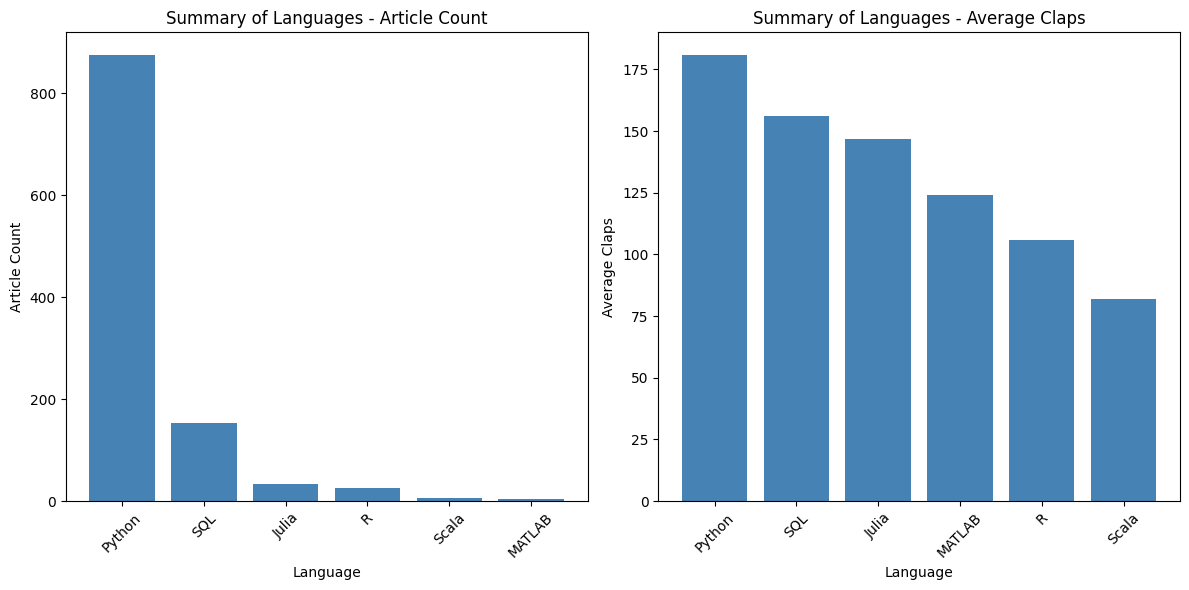

In [11]:
# sort data for chart 1
summary_languages_count1 = summary_languages_count.sort_values(by="Count", ascending=False)

# sort data for chart 2
summary_languages_count2 = summary_languages_count.sort_values(by="AvgClaps", ascending=False)

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot chart 1
ax1.bar(summary_languages_count1["Topic"], summary_languages_count1["Count"], color="steelblue")
ax1.set_xlabel("Language")
ax1.set_ylabel("Article Count")
ax1.set_title("Summary of Languages - Article Count")
ax1.set_xticklabels(summary_languages_count1["Topic"])
ax1.tick_params(axis="x", labelrotation=45)

# plot chart 2
ax2.bar(summary_languages_count2["Topic"], summary_languages_count2["AvgClaps"], color="steelblue")
ax2.set_xlabel("Language")
ax2.set_ylabel("Average Claps")
ax2.set_title("Summary of Languages - Average Claps")
ax2.set_xticklabels(summary_languages_count2["Topic"])
ax2.tick_params(axis="x", labelrotation=45)

plt.tight_layout() # adjust the layout

plt.show() # display the plot

## Topics Summary

In [12]:
# topic to look into
topics = {
    'ml': 'Machine Learning',
    'ai': 'Artificial Intelligence',
    'modeling': 'Data Modeling',
    'statistics': 'Statistics',
    'data visualization': 'Data Visualization',
    'nlp': 'Natural Language Processing',
    'deep learning': 'Deep Learning',
    'data engineering': 'Data Engineering',
    'optimization': 'Optimization',
    'experimental design': 'Experimental Design',
    'big data analytics': 'Big Data Analytics'
}

summary_topics_count = pd.DataFrame(columns=["Topic", "Count", "AvgClaps"]) # create dataframe for summary

for topic, topic_main in topics.items():
    count = df5[topic].sum() # count articles
    topic_df = df5[df5[topic] == 1].reset_index(drop=True) # articles where title has topic
    clap_count = topic_df["claps"].sum() # total claps
    clap_average = clap_count/count # average claps
    if count and clap_count > 0:
        # create summary with concat for each topic
        summary_topics_count = pd.concat([summary_topics_count, pd.DataFrame({"Topic": [topic_main], "Count": [count], "AvgClaps": [int(clap_average)]})], ignore_index=True)
    
print(summary_topics_count)

                          Topic Count AvgClaps
0              Machine Learning   457      160
1       Artificial Intelligence   526      174
2                 Data Modeling    34      180
3                    Statistics    14      206
4            Data Visualization    23      194
5   Natural Language Processing    59      106
6                 Deep Learning    54      136
7              Data Engineering     4      167
8                  Optimization    38      188
9           Experimental Design    10      205
10           Big Data Analytics    47      115


In [13]:
topic_mapping = {
    'ml': 'Machine Learning',
    'ai': 'Artificial Intelligence',
    'modeling': 'Data Modeling',
    'statistics': 'Statistics',
    'data visualization': 'Data Visualization',
    'nlp': 'Natural Language Processing',
    'deep learning': 'Deep Learning',
    'data engineering': 'Data Engineering',
    'optimization': 'Optimization',
    'experimental design': 'Experimental Design',
    'big data analytics': 'Big Data Analytics'
}

# Renaming the topics
renamed_data = [[topic_mapping.get(row[0], row[0]), row[1], row[2]] for row in summary_topics_count]

print(renamed_data)

[['T', 'o', 'p'], ['C', 'o', 'u'], ['A', 'v', 'g']]


/tmp/ipykernel_4765/3765174307.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(summary_topics_count1["Topic"], rotation=45)
/tmp/ipykernel_4765/3765174307.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(summary_topics_count2["Topic"], rotation=45)


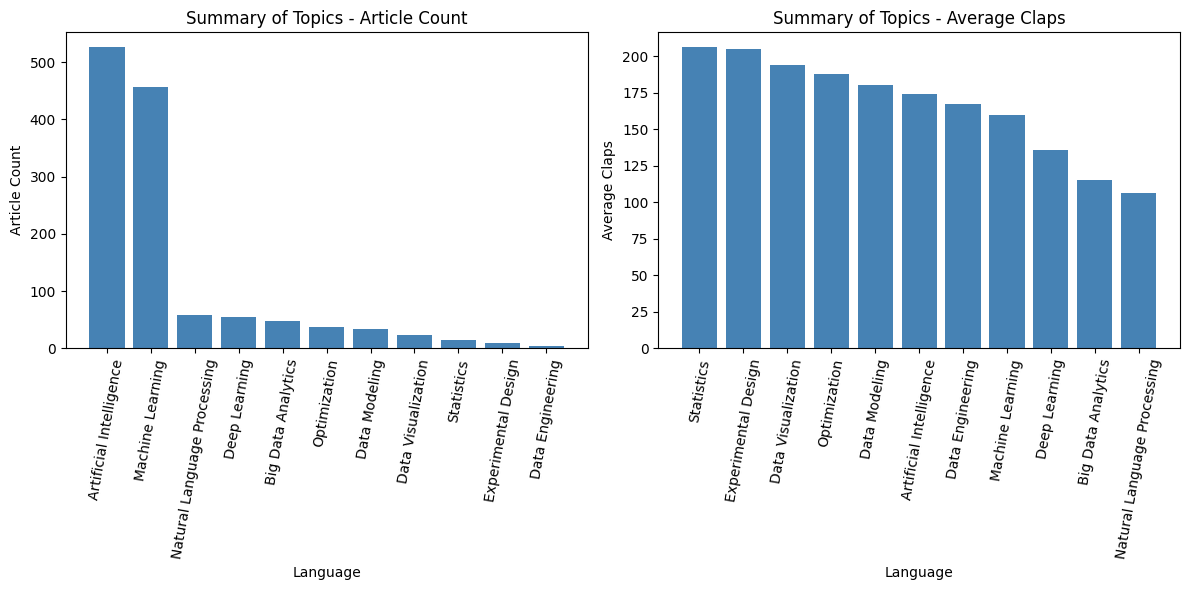

In [14]:
# sort data for chart 1
summary_topics_count1 = summary_topics_count.sort_values(by="Count", ascending=False)

# sort data for chart 2
summary_topics_count2 = summary_topics_count.sort_values(by="AvgClaps", ascending=False)

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot chart 1
ax1.bar(summary_topics_count1["Topic"], summary_topics_count1["Count"], color="steelblue")
ax1.set_xlabel("Language")
ax1.set_ylabel("Article Count")
ax1.set_title("Summary of Topics - Article Count")
ax1.set_xticklabels(summary_topics_count1["Topic"], rotation=45)
ax1.tick_params(axis="x", labelrotation=80)

# plot chart 2
ax2.bar(summary_topics_count2["Topic"], summary_topics_count2["AvgClaps"], color="steelblue")
ax2.set_xlabel("Language")
ax2.set_ylabel("Average Claps")
ax2.set_title("Summary of Topics - Average Claps")
ax2.set_xticklabels(summary_topics_count2["Topic"], rotation=45)
ax2.tick_params(axis="x", labelrotation=80)

plt.tight_layout() # adjust the layout

plt.show() # display the plot

## Reading Time vs Claps

### Remove outliers for reading time

In [15]:
print(df5["reading_time"].mean())

7.619741432382516


In [16]:
import numpy as np

# calculate z-scores for reading_time
z_scores = (df5["reading_time"] - df5["reading_time"].mean()) / df5["reading_time"].std()

outlier_threshold = 3 # threshold for outliers (z-score > 3 or < -3)

outlier_mask = np.abs(z_scores) > outlier_threshold # create a boolean mask to identify outliers

df5_filtered = df5[~outlier_mask] # filter the dataframe to remove outliers

In [17]:
print(df5_filtered["reading_time"].mean())

7.395846313603323


In [18]:
# creat summary for reading_time including claps count, sum and mean
rt_summary = df5_filtered[["claps", "reading_time"]].groupby("reading_time").agg({"claps": ["count", "sum", "mean"]})

# change column type
rt_summary["claps", "mean"] = rt_summary["claps", "mean"].astype(int)

print(rt_summary)

             claps             
             count     sum mean
reading_time                   
2               10     446   44
3              167   18445  110
4              477   63030  132
5              809  117004  144
6              761  112175  147
7              696  109900  157
8              537   85475  159
9              394   67575  171
10             290   56041  193
11             175   30487  174
12             159   28274  177
13              90   19097  212
14              58   10493  180
15              69    9821  142
16              51   11036  216
17              25    4233  169
18              27    4667  172
19              20    4618  230


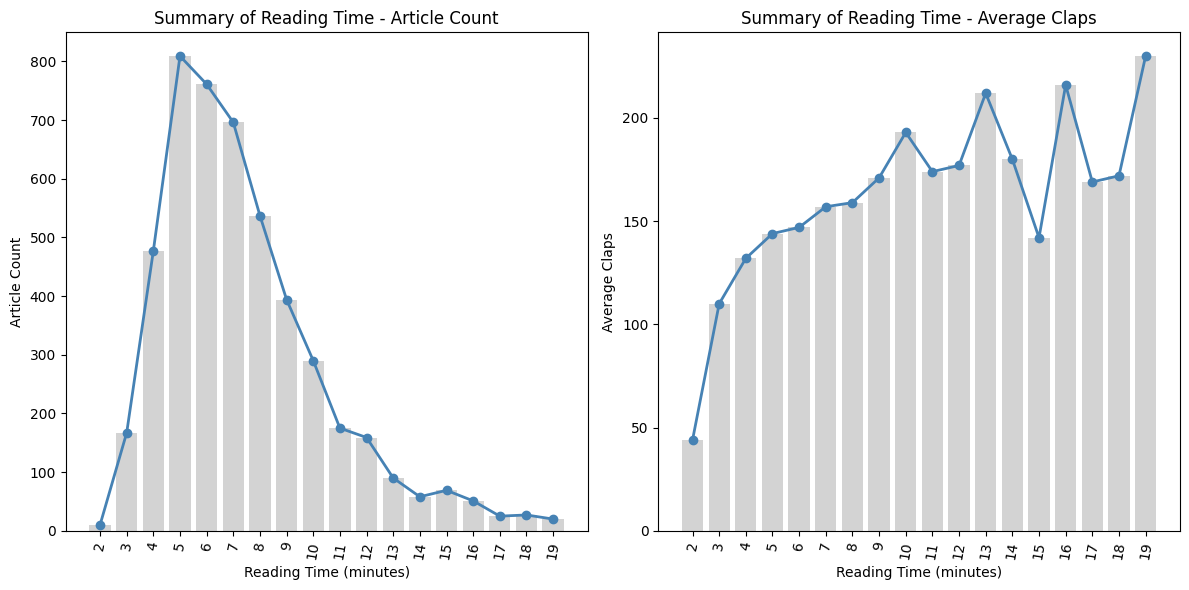

In [19]:
# reset index
rt_summary = rt_summary.reset_index()

# sort data for chart 1
rt_summary1 = rt_summary.sort_values(by="reading_time", ascending=True)

# sort data for chart 2
rt_summary2 = rt_summary.sort_values(by="reading_time", ascending=True)

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot chart 1 - bar plot
ax1.bar(rt_summary1["reading_time"], rt_summary1[("claps", "count")], color="lightgray")

# line plot
ax1.plot(rt_summary1["reading_time"], rt_summary1[("claps", "count")], color="steelblue", marker="o", linewidth=2)

# format chart 1
ax1.set_xlabel("Reading Time (minutes)")
ax1.set_ylabel("Article Count")
ax1.set_title("Summary of Reading Time - Article Count")
ax1.set_xticks(rt_summary1["reading_time"])  # set x-ticks to all values
ax1.tick_params(axis="x", labelrotation=80)

# plot chart 2 - bar plot
ax2.bar(rt_summary2["reading_time"], rt_summary2[("claps", "mean")], color="lightgray")

# line plot
ax2.plot(rt_summary2["reading_time"], rt_summary2[("claps", "mean")], color="steelblue", marker="o", linewidth=2)

# format chart 2
ax2.set_xlabel("Reading Time (minutes)")
ax2.set_ylabel("Average Claps")
ax2.set_title("Summary of Reading Time - Average Claps")
ax2.set_xticks(rt_summary2["reading_time"])  # set x-ticks to all values
ax2.tick_params(axis="x", labelrotation=80)

plt.tight_layout() # adjust the layout

plt.show() # display the plot